# Import packages

In [25]:
import pandas as pd
import re

import sys
sys.path.append('../')
from aqc_utils.gaussian_log_extractor import *
from aqc_utils.molecule import molecule
from aqc_utils.slurm_manager import slurm_manager
from aqc_utils.helper_classes import slurm_status

import logging
logging.basicConfig(level=logging.INFO)

# Objectif :
definir une fonction qui permet de generer un dataframe ou d'updater un .csv avec les molecules calculées et toutes leurs caracteristiques

## First Step
Recupérer les datas d'une molécule

In [26]:
sm=slurm_manager(user='jschleinitz', host='hermite.chimie.ens.fr')
sm.connect()

INFO:aqc_utils.slurm_manager:Creating connection to hermite.chimie.ens.fr as jschleinitz
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!
INFO:aqc_utils.slurm_manager:Connected to hermite.chimie.ens.fr as jschleinitz is True.


In [27]:
jobs_c = sm.get_jobs(slurm_status.created)
sm.update_status(sm.get_jobs())
sm.update_submitted_jobs()

grep: C11H10O_b7a8_conf_0.log: No such file or directory
grep: C14H18OSi_95fa_conf_0.log: No such file or directory
grep: C16H19NO_f5e7_conf_0.log: No such file or directory
grep: C11H10O2_d7c7_conf_0.log: No such file or directory
grep: C11H10O_9eb4_conf_0.log: No such file or directory
grep: C8H10O_fd16_conf_0.log: No such file or directory
grep: C11H17NO_9080_conf_0.log: No such file or directory
grep: C11H17NO_d167_conf_0.log: No such file or directory
grep: C8H10O2_8f9c_conf_0.log: No such file or directory
grep: C9H12O2_df4c_conf_0.log: No such file or directory
grep: C10H11NO_10ad_conf_0.log: No such file or directory
grep: C14H13NO_5f00_conf_0.log: No such file or directory
grep: C12H12O_d53c_conf_0.log: No such file or directory
grep: C13H14O_eb43_conf_0.log: No such file or directory
grep: C13H16OSi_b5e5_conf_0.log: No such file or directory
grep: C16H22OSi_6b20_conf_0.log: No such file or directory
grep: C14H18OSi_822f_conf_0.log: No such file or directory
grep: C15H20OSi_a8

grep: C23H30O3_9b76_conf_0.log: No such file or directory
grep: C21H19FO2_6f90_conf_0.log: No such file or directory
grep: C20H25NO3_662d_conf_0.log: No such file or directory
grep: C17H18O4_ef6c_conf_0.log: No such file or directory
grep: C24H36O2Si_f68a_conf_0.log: No such file or directory
grep: C15H17NO2_e7ee_conf_0.log: No such file or directory
grep: C15H22O2_1360_conf_0.log: No such file or directory
grep: C12H13F3O2_c0b9_conf_0.log: No such file or directory
grep: C17H25BO4_9b0f_conf_0.log: No such file or directory
grep: C16H22O3_394c_conf_0.log: No such file or directory
grep: C12H16O3_f69c_conf_0.log: No such file or directory
grep: C13H19NO2_4fb7_conf_0.log: No such file or directory
grep: C13H18O2_6664_conf_0.log: No such file or directory
grep: C17H18O2_22f3_conf_0.log: No such file or directory
grep: C12H14O4_b865_conf_0.log: No such file or directory
grep: C17H16O3_7711_conf_0.log: No such file or directory
grep: C18H14O3_19a5_conf_0.log: No such file or directory
grep:

grep: C11H17NO2_16c8_conf_0.log: No such file or directory
grep: C13H12O_3674_conf_0.log: No such file or directory
grep: C11H16O_2e51_conf_0.log: No such file or directory
grep: C9H12O2_d4d9_conf_0.log: No such file or directory
grep: C13H18N2O_d359_conf_0.log: No such file or directory
grep: C17H27NO_0b37_conf_0.log: No such file or directory
grep: C9H13NO_7ff1_conf_0.log: No such file or directory
grep: C10H15NO_befa_conf_0.log: No such file or directory
grep: C20H20O_4b3c_conf_0.log: No such file or directory
grep: C17H14O_3d00_conf_0.log: No such file or directory
grep: C8H10O2_e0c2_conf_0.log: No such file or directory
grep: C12H12N2O2_6d0b_conf_0.log: No such file or directory
grep: C9H12O3_9926_conf_0.log: No such file or directory


 Entering Gaussian System, Link 0=g09
 Input=C20H28O2_1cb0_conf_0.com
 Entering Gaussian System, Link 0=g09
 Input=C20H28O2_1cb0_conf_1.com


grep: C15H12O_d275_conf_0.log: No such file or directory
grep: C13H12O3_e27f_conf_0.log: No such file or directory
grep: C9H10O2_444d_conf_0.log: No such file or directory
grep: C14H18N2O2_b0ad_conf_0.log: No such file or directory
grep: C12H14F3NO2_3045_conf_0.log: No such file or directory
grep: C11H14FNO2_0756_conf_0.log: No such file or directory
grep: C15H22N2O3_1f6b_conf_0.log: No such file or directory
grep: C25H35NO4_68df_conf_0.log: No such file or directory
grep: C15H21NO3_6df1_conf_0.log: No such file or directory
grep: C18H20N2O2_5d63_conf_0.log: No such file or directory
grep: C9H11NO2_01e0_conf_0.log: No such file or directory
grep: C11H15NO2_9d06_conf_0.log: No such file or directory
grep: C13H19NO2_23d2_conf_0.log: No such file or directory
grep: C15H21NO4_2e74_conf_0.log: No such file or directory
grep: C11H16N2O2_dc18_conf_0.log: No such file or directory
grep: C14H14O_383b_conf_0.log: No such file or directory
grep: C16H20OSi_5b73_conf_0.log: No such file or director

 Entering Gaussian System, Link 0=g09
 Input=Li+_2b62_conf_0.com
 Entering Gaussian System, Link 0=g09
 Input=Mg++_f6c1_conf_0.com


grep: C6H11BrMg_f96f_conf_0.log: No such file or directory
grep: C7H7BrMg_743d_conf_0.log: No such file or directory
grep: CH3IMg_bff6_conf_0.log: No such file or directory
grep: C9H18NO-_c207_conf_0.log: No such file or directory
grep: C14H12_ce71_conf_0.log: No such file or directory


 Entering Gaussian System, Link 0=g09
 Input=C9H11BrMg_e4d5_conf_0.com


grep: O-_c6c1_conf_0.log: No such file or directory


 Entering Gaussian System, Link 0=g09
 Input=Na+_a7e7_conf_0.com


grep: F-_e707_conf_0.log: No such file or directory
grep: Mn_0e2b_conf_0.log: No such file or directory
grep: Zn_bbf0_conf_0.log: No such file or directory
grep: H2O4P-_fd21_conf_0.log: No such file or directory
grep: I-_3625_conf_0.log: No such file or directory
grep: C3H9ClSi_ed42_conf_0.log: No such file or directory
grep: Zn++_f4c2_conf_0.log: No such file or directory
grep: C8H20N+_75f0_conf_0.log: No such file or directory
grep: C6H6O_4368_conf_0.log: No such file or directory
grep: C6H15N_5ff7_conf_0.log: No such file or directory
grep: C5H10O2_a8a2_conf_0.log: No such file or directory
grep: CH2O3--_edb0_conf_0.log: No such file or directory
grep: Rb+_082f_conf_0.log: No such file or directory
grep: C5H9O2-_6091_conf_0.log: No such file or directory
grep: Ag+_5dc1_conf_0.log: No such file or directory
grep: Cu++_65fa_conf_0.log: No such file or directory
grep: C16H36N+_1be3_conf_0.log: No such file or directory
grep: Br-_7190_conf_0.log: No such file or directory
grep: O4S--_90

 Entering Gaussian System, Link 0=g09
 Input=C12H27AlO3-_0d66_conf_0.com


grep: AlCl3_fbe2_conf_0.log: No such file or directory
grep: BF3_c51f_conf_0.log: No such file or directory
grep: BBr3_d860_conf_0.log: No such file or directory
grep: Y+++_af19_conf_0.log: No such file or directory


 Entering Gaussian System, Link 0=g09
 Input=Al+++_ce27_conf_0.com


grep: C6H15B_74e5_conf_0.log: No such file or directory
grep: C3H9BO3_97b6_conf_0.log: No such file or directory
grep: C16H36O4Zr_534e_conf_0.log: No such file or directory
grep: C3H7O-_edf6_conf_0.log: No such file or directory
grep: C2H4O2_fe39_conf_0.log: No such file or directory
grep: Ag_9aa7_conf_0.log: No such file or directory
grep: Cl4Zr_7d7d_conf_0.log: No such file or directory
grep: ClLi_e823_conf_0.log: No such file or directory
grep: C12H27AlO3_e518_conf_0.log: No such file or directory


In [28]:
sm.retrieve_jobs()
sm.get_job_stats(split_by_can=True)

INFO:aqc_utils.slurm_manager:There are 0 running/pending jobs, 10 finished jobs.
INFO:aqc_utils.slurm_manager:Retrieving log files of finished jobs.
INFO:paramiko.transport.sftp:[chan 426] Opened sftp connection (server version 3)


/Users/julesschleinitz/Library/Application Support/hermite/C20H28O2_1cb0/C20H28O2_1cb0_conf_0.log
/Users/julesschleinitz/Library/Application Support/hermite/C20H28O2_1cb0/C20H28O2_1cb0_conf_1.log


/Users/julesschleinitz/Library/Application Support/hermite/Li+_2b62/Li+_2b62_conf_0.log
/Users/julesschleinitz/Library/Application Support/hermite/Mg++_f6c1/Mg++_f6c1_conf_0.log
/Users/julesschleinitz/Library/Application Support/hermite/C9H11BrMg_e4d5/C9H11BrMg_e4d5_conf_0.log


/Users/julesschleinitz/Library/Application Support/hermite/Na+_a7e7/Na+_a7e7_conf_0.log


INFO:aqc_utils.slurm_manager:1 jobs finished successfully (all Gaussian steps finished normally). 345 jobs failed.


/Users/julesschleinitz/Library/Application Support/hermite/C12H27AlO3-_0d66/C12H27AlO3-_0d66_conf_0.log
/Users/julesschleinitz/Library/Application Support/hermite/Al+++_ce27/Al+++_ce27_conf_0.log


status,done,failed,incomplete,uploaded
can,,,,
BrB(Br)Br,0,0,0,1
Br[Mg]C1CCCCC1,0,0,0,1
Br[Mg]Cc1ccccc1,0,0,0,1
Br[Mg]c1c(C)cc(cc1C)C,0,0,1,0
C(Oc1ccccc1)Oc1ccccc1,0,1,0,0
...,...,...,...,...
[Rb+],0,0,0,1
[Sr+2],0,0,0,1
[Y+3],0,0,0,1


In [29]:
df = sm.get_job_stats(split_by_can=True)
np.sum(df["failed"])
print(np.sum(df["failed"]), np.sum(df["uploaded"]), np.sum(df["done"])), #np.sum(df["incomplete"]))

343 77 1


(None,)

In [30]:
sm.squeue()

,RUNNING
jobs,1


# It is very important here to update with a suited tag name the molecules !


In [31]:
sm.upload_done_molecules_to_db(tags="JS_substrate")

INFO:aqc_utils.slurm_manager:There are no molecules with all jobs done. Exitting.


In [32]:
for job in sm.get_jobs(slurm_status.uploaded):
    job_to_change = sm.get_jobs()[job].base_name
    with sm.connection.cd("/home/jschleinitz/gaussian/"):
        try:
            sm.connection.run(f"mv {job_to_change}.chk ../gaussian_uploaded")
            sm.connection.run(f"mv {job_to_change}.out ../gaussian_uploaded")
            sm.connection.run(f"mv {job_to_change}.log ../gaussian_uploaded")
            sm.connection.run(f"mv {job_to_change}.com ../gaussian_uploaded")               
            sm.connection.run(f"mv {job_to_change}.sh ../gaussian_uploaded")
        except:
            pass

mv: cannot stat 'C11H10O_b7a8_conf_0.chk': No such file or directory
mv: cannot stat 'C14H18OSi_95fa_conf_0.chk': No such file or directory
mv: cannot stat 'C16H19NO_f5e7_conf_0.chk': No such file or directory
mv: cannot stat 'C11H10O2_d7c7_conf_0.chk': No such file or directory
mv: cannot stat 'C11H10O_9eb4_conf_0.chk': No such file or directory
mv: cannot stat 'C8H10O_fd16_conf_0.chk': No such file or directory
mv: cannot stat 'C11H17NO_9080_conf_0.chk': No such file or directory
mv: cannot stat 'C11H17NO_d167_conf_0.chk': No such file or directory
mv: cannot stat 'C8H10O2_8f9c_conf_0.chk': No such file or directory
mv: cannot stat 'C9H12O2_df4c_conf_0.chk': No such file or directory
mv: cannot stat 'C10H11NO_10ad_conf_0.chk': No such file or directory
mv: cannot stat 'C14H13NO_5f00_conf_0.chk': No such file or directory
mv: cannot stat 'C12H12O_d53c_conf_0.chk': No such file or directory
mv: cannot stat 'C13H14O_eb43_conf_0.chk': No such file or directory
mv: cannot stat 'C13H16OSi_

In [33]:
from rdkit import Chem

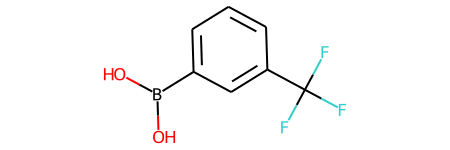

In [34]:
Chem.MolFromSmiles('OB(c1cccc(c1)C(F)(F)F)O')